# In vivo demo
Melodi Anahtar 
Updated September 22, 2021

In this demonstration, you are going to see how to:
1) Convert raw mass spectrometry data into a data matrix that can be used for downstream analysis 
2) Normalize this matrix based on your specifications
3) Visualize the relative reporter concentrations using PCA and volcano plots 
4) Use the reporter concentrations to train a classifier, perform cross-validation, and test on another dataset

This data comes from Kirkpatrick et al., Science Translational Medicine (2020). The data is from healthy and lung cancer mice that were injected with a 14-plex activity-based nanosensor panel at 5 weeks and 7.5 weeks after tumor initiation. 

In [1]:
cd

/Users/melodi


In [2]:
cd protease_activity_analysis

/Users/melodi/protease_activity_analysis


In [3]:
import protease_activity_analysis as paa

#### Read the data file containing the mass spectrometry data from the 5 week injection into a python data matrix 

In [4]:
# Initialize the matrix that all of the data you will analyze will go into
KP5wk = paa.syneos.SyneosDataset(
    save_dir='outputs/', save_name='2021_09_13_5wks') 

# File that has the raw mass spec data.
data_path = 'data/stm_invivo/KP_5wks/2017_11.30_BatchG_Lu.08_RESULTS.xlsx'

# Names of the sheets within the data that have the relevant data. 
# The columns that are read from these sheets is hardcoded in line 13 of syneos.py.
# To create a data matrix from an Excel file in a different format, change the columns 
# and sheets as needed. 
sheets = ['Rev3-CONH2-1', 'Rev3-CONH2-2']

# Descriptions/categorizations for each sample. 
type_path = 'data/stm_invivo/KP_5wks/KP_5wks_IDtoSampleType.xlsx'

# The specification of which stock is being used for internal normalization.
# This is a particularly useful feature if you have in vivo data that was generated using 
# different ABN stocks. Simply indicate which stock was administered into each animal. 
stock_path = 'data/stm_invivo/KP_5wks/KP_5wks_IDtoStock.xlsx'

# Define where you want your files to be output.
out_path= 'outputs/'

# Start of the file name for the outputs. 
save_name = 'KP5wks'

# Compiles all of the elements of the data into 1 matrix that is displayed below
KP5wk.read_syneos_data(
    data_path, type_path, stock_path, sheets)

Compound                           1U-R3_01   1U-R3_11   2U-R3_02   2U-R3_13  \
Sample Type Sample ID Stock Type                                               
Control     C1-1A     Inj          0.020373   0.015167   0.056997   0.063752   
            C1-2A     Inj          0.017040   0.039766   0.032123   0.055820   
            C10-1A    Inj          0.051203   0.082146   0.106654   0.166228   
            C10-2A    Inj          0.000000   0.008593   0.033161   0.042068   
            C11-1A    Inj          0.058887   0.066597   0.126244   0.138821   
            C11-2A    Inj          0.000000   0.000000   0.040021   0.000000   
            C12-1A    Inj          0.054935   0.083589   0.097860   0.116810   
            C12-2A    Inj          0.016472   0.036393   0.050717   0.057191   
            C2-1A     Inj          0.018109   0.038030   0.066213   0.077692   
            C2-2A     Inj          0.015779   0.014147   0.042867   0.046102   
            C3-1A     Inj          0.089153   0.136278   0.171689   0.224573   
            C3-2A     Inj          0.000000   0.106066   0.066831   0.098709   
            C4-1A     Inj          0.138937   0.204295   0.234546   0.313436   
            C4-2A     Inj          0.038606   0.189268   0.137369   0.219410   
            C5-1A     Inj          0.061591   0.089833   0.111510   0.140359   
            C5-2A     Inj          0.088302   0.220809   0.160116   0.259477   
            C6-1A     Inj          0.121775   0.118454   0.211973   0.244336   
            C6-2A     Inj          0.089403   0.166242   0.111715   0.122001   
            C8-1A     Inj          0.014319   0.070573   0.046809   0.068923   
            C8-2A     Inj          0.014699   0.000000   0.039923   0.041444   
            C9-1A     Inj          0.045841   0.063185   0.085015   0.127432   
            C9-2A     Inj          0.017164   0.028091   0.031739   0.058800   
KP          KP1-1A    Inj          0.067775   0.052043   0.096295   0.150711   
            KP1-2A    Inj          0.026080   0.054862   0.051128   0.076976   
            KP10-1A   Inj          0.072639   0.105198   0.137658   0.157100   
            KP10-2A   Inj          0.034120   0.079091   0.071187   0.077921   
            KP11-1A   Inj          0.121964   0.187121   0.202065   0.256762   
            KP11-2A   Inj          0.041991   0.128578   0.099665   0.121249   
            KP12-1A   Inj          0.065948   0.090210   0.138870   0.117677   
            KP12-2A   Inj          0.010614   0.031327   0.030518   0.034062   
            KP2-1A    Inj          0.107864   0.104596   0.160540   0.222176   
            KP2-2A    Inj          0.039890   0.078856   0.097764   0.107373   
            KP3-1A    Inj          0.131098   0.192578   0.240321   0.322364   
            KP3-2A    Inj          0.021778   0.000000   0.048988   0.064693   
            KP4-1A    Inj          0.017989   0.057168   0.053861   0.083559   
            KP4-2A    Inj          0.016690   0.064999   0.049364   0.077138   
            KP5-1A    Inj          0.064085   0.080364   0.144794   0.164176   
            KP5-2A    Inj          0.000000   0.059220   0.054026   0.078614   
            KP6-1A    Inj          0.114057   0.146297   0.170021   0.232282   
            KP6-2A    Inj          0.086042   0.192456   0.180310   0.239449   
            KP7-1A    Inj          0.083323   0.108064   0.135203   0.168499   
            KP7-2A    Inj          0.000000   0.025457   0.040797   0.025474   
            KP8-1A    Inj          0.195338   0.243529   0.281626   0.403307   
            KP8-2A    Inj          0.050208   0.033751   0.056829   0.083815   
            KP9-1A    Inj          0.024062   0.032055   0.052480   0.066053   
            KP9-2A    Inj          0.000000   0.088858   0.071018   0.063644   
Stock       Inj       Inj         18.618014  15.073686  28.520854  29.312202   

Compound                           3U-R3_03   3U-R3_15   4U-R3_04   4U-R3_16  \

In [5]:
# You can rename the reporters if you want to customize the data for analysis
features, renamed = KP5wk.set_feature_mapping('data/stm_invivo/14plex.csv')

# Below you can see the original names of each reporter in the 14-plex 
features

['1U-R3_01',
 '2U-R3_02',
 '3U-R3_03',
 '4U-R3_04',
 '5U-R3_05',
 '6U-R3_06',
 '7U-R3_07',
 '8U-R3_08',
 '9U-R3_10',
 '1U-R3_11',
 '2U-R3_13',
 '3U-R3_15',
 '4U-R3_16',
 '5U-R3_18']

In [6]:
# Now you will see what they were renamed, which matches the nomenclature in the paper 
# from where this data was taken.
renamed

['PP01',
 'PP02',
 'PP03',
 'PP04',
 'PP05',
 'PP06',
 'PP07',
 'PP08',
 'PP09',
 'PP10',
 'PP11',
 'PP12',
 'PP13',
 'PP14']

#### Process and normalize the data matrix 

In [7]:
# The process_syneos_data function will filter the data matrix based on any specifications you input in terms of 
# which reporters will be included in the analysis, which samples you want to analyze, and specifies 
# how each sample should be normalized to the ABN stock
KP5wk.process_syneos_data(features, ['Inj'])

# Mean scale the data matrix across features  
KP5wk.mean_scale_matrix()

/Users/melodi/miniconda3/envs/paa/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/melodi/protease_activity_analysis/protease_activity_analysis/syneos.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  /= stock_values


Compound                   PP01      PP02      PP03      PP04      PP05  \
Sample Type Sample ID                                                     
Control     C1-1A      0.558590  1.020122  1.197960  1.143270  0.830946   
            C1-2A      0.431618  0.531139  1.516902  1.464659  0.889261   
            C10-1A     0.598471  0.813766  1.142036  1.172138  0.908744   
            C10-2A     0.000000  0.849861  1.314372  1.264725  1.232172   
            C11-1A     0.680800  0.952750  1.146396  1.258938  0.796729   
            C12-1A     0.792502  0.921579  1.171073  1.200542  0.829560   
            C12-2A     0.442352  0.889117  1.497143  1.667677  0.625549   
            C2-1A      0.367905  0.878103  1.161292  1.178595  1.078365   
            C2-2A      0.502862  0.891775  1.021844  1.287812  2.138865   
            C3-1A      0.717193  0.901592  1.026750  1.369000  0.729752   
            C3-2A      0.000000  0.611906  1.386136  1.716618  0.680783   
            C4-1A      0.726473  0.800574  0.907846  1.424781  0.566096   
            C4-2A      0.211433  0.491106  1.124555  1.966587  0.713247   
            C5-1A      0.554262  0.655060  0.815286  1.604670  0.668627   
            C5-2A      0.369669  0.437568  0.842516  2.087554  0.641811   
            C6-1A      0.706854  0.803196  0.887018  1.502922  0.760488   
            C6-2A      0.726488  0.592596  1.142513  1.829892  0.695250   
            C8-1A      0.338497  0.722346  1.010929  1.124596  1.053689   
            C9-1A      0.618113  0.748305  0.893520  1.253746  0.879108   
            C9-2A      0.518263  0.625597  1.080406  1.263841  1.443086   
KP          KP1-1A     0.643125  0.596491  0.797160  1.655083  0.652995   
            KP1-2A     0.310163  0.396927  0.935054  2.163528  0.675193   
            KP10-1A    0.725627  0.897664  1.360415  1.306018  0.627802   
            KP10-2A    0.594950  0.810300  1.111712  1.647738  0.664895   
            KP11-1A    0.774752  0.837900  0.958383  1.298046  0.747537   
            KP11-2A    0.399670  0.619236  1.109795  1.911919  0.657283   
            KP12-1A    0.734381  1.009481  1.114752  1.605679  0.693766   
            KP12-2A    0.425200  0.798078  1.911140  1.558179  0.687704   
            KP2-1A     0.770661  0.748753  0.951953  1.623466  0.554100   
            KP2-2A     0.398229  0.637116  1.398191  1.793325  0.579063   
            KP3-1A     0.722829  0.864974  1.090230  1.411865  0.744158   
            KP3-2A     0.591599  0.868720  1.494383  1.529093  0.747516   
            KP4-1A     0.383739  0.750035  1.089088  1.005352  0.920546   
            KP4-2A     0.299409  0.578102  1.287679  2.053060  0.771905   
            KP5-1A     0.618547  0.912300  1.050847  1.380967  0.765093   
            KP5-2A     0.000000  0.764697  1.344254  1.659306  0.908488   
            KP6-1A     0.645706  0.628330  0.883523  1.784072  0.587246   
            KP6-2A     0.443661  0.606917  1.024671  1.960508  0.543855   
            KP7-1A     0.724095  0.766984  1.147844  1.687485  0.609039   
            KP8-1A     0.776003  0.730331  1.067544  1.564258  0.645465   
            KP8-2A     1.006960  0.744018  1.526331  1.481873  0.897978   
            KP9-1A     0.709433  1.010077  1.072821  1.243054  0.901603   
            KP9-2A     0.000000  0.895351  1.635419  1.852729  1.008689   

Compound                   PP06      PP07      PP08      PP09      PP10  \
Sample Type Sample ID                                                     
Control     C1-1A      2.062659  1.297544  0.980661  0.927988  0.513621   
            C1-2A      2.658365  0.668426  1.268606  0.953292  1.244067   
            C10-1A     1.971983  0.901234  0.841591  0.886529  1.185906   
            C10-2A     1.959659  0.930887  1.590909  0.858312  0.416663   
            C11-1A     2.247491  0.824197  0.828358  0.842993  0.950969   
            C12-1A     1.506400  0.856991  0.980590  1.042472  1.489432   
            C12-2A     2

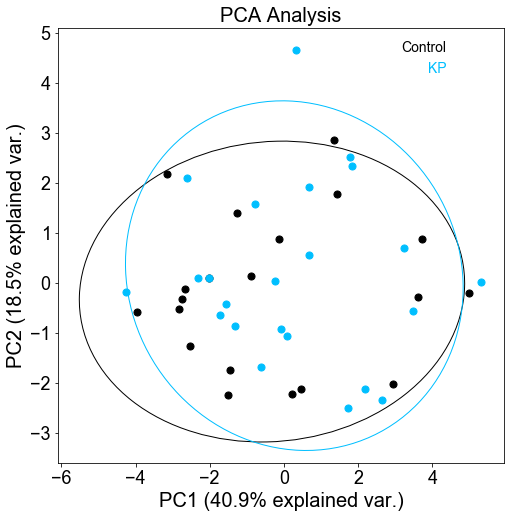

In [8]:
# Use the mean scaled data to perform PCA for the 5 week data by Sample Type (e.g. Control v KP)
    
paa.vis.plot_pca(KP5wk.mean_scaled_matrix, KP5wk.features, 
              group_key='Sample Type', pca_groups=None, biplot=False, out_path=out_path, file_name=save_name)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

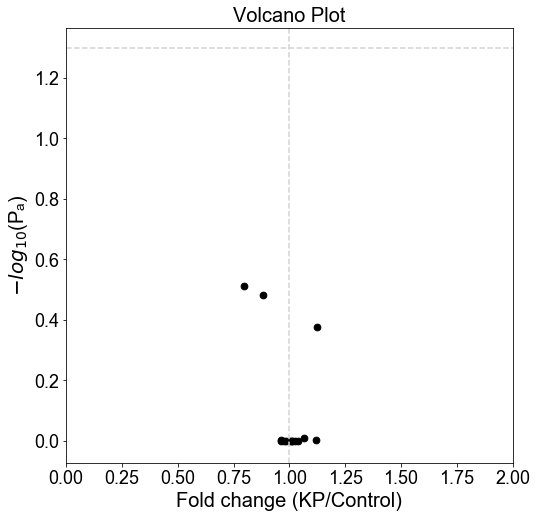

In [9]:
# Use the mean scaled data to make a volcano plot for enrichment analysis of the 5 wk data by Sample Type (e.g. Control v KP)

paa.vis.plot_volcano(KP5wk.mean_scaled_matrix, KP5wk.features, group_key='Sample Type', 
                    group1=None, group2=None, out_path=out_path, file_name=save_name)


## Train binary classifiers and plot resulting ROC curves

In [10]:
# Select the pkl files that you want to use to train the classifier 
files = ['outputs/2021_09_13_KP5wks_mean.pkl']
Wk5data_for_class = paa.syneos.SyneosDataset(save_dir=out_path, save_name=save_name, file_list=files)

# Create the training and validation subsets 
Wk5X, Wk5Y, Wk5df, Wk5X_test, Wk5Y_test, Wk5df_test = Wk5data_for_class.make_class_dataset(
        'KP',
        'KP',
        'Control',
        'Control'
    )

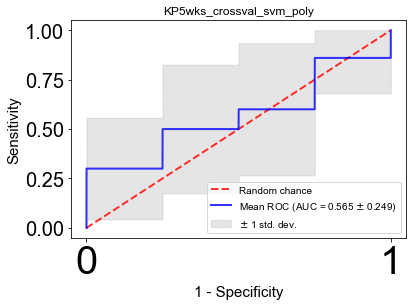

In [11]:
# Create and validate the classifier 

# Can change the classifier from 'svm' to 'rf' (Random forest) or 'lr' (Logistic regression)
classifier = 'svm'
classifier_name = classifier

# Can change the kernel to poly, linear, rbf
if classifier == 'svm':
    kernel = 'poly'
    classifier_name = classifier_name + "_" + kernel

# Creating the classifier and performing cross-validation
val_class_dict, test_class_dict = paa.classify.classify_kfold_roc(Wk5X, Wk5Y, classifier, kernel, 10, 'KP', False)

# Cross-validation performance
tprs_val = val_class_dict["tprs"]
aucs_val = val_class_dict["aucs"]

save_name_val = save_name + "_crossval_" + classifier_name
paa.vis.plot_kfold_roc(tprs_val, aucs_val, out_path, save_name_val, show_sd=True)

#  Will be able to see the ROC curve in your outputs folder

## Repeat binary classification on a new dataset

In [12]:
# This section of code will essentially repeat what was done above, except with the 7.5 week data 

KP75wk = paa.syneos.SyneosDataset(
    save_dir='outputs/', save_name='2021_09_13_7.5wks')

data_path = 'data/stm_invivo/KP_7.5wks/2017_12.19_BatchH_Lu.08_RESULTS.xlsx'

type_path = 'data/stm_invivo/KP_7.5wks/KP_7.5wks_IDtoSampleType.xlsx'

stock_path = 'data/stm_invivo/KP_7.5wks/KP_7.5wks_IDtoStock.xlsx'

save_name = 'KP7.5wks'

KP75wk.read_syneos_data(data_path, type_path, stock_path, sheets)

features, renamed = KP75wk.set_feature_mapping('data/stm_invivo/14plex.csv')

KP75wk.process_syneos_data(features, ['inj'])

KP75wk.mean_scale_matrix()

#Make the pkl files without doing the pca and volcano analyses 
KP75wk.data_to_pkl(save_name)


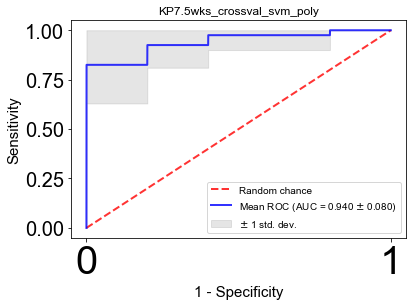

In [13]:
# Use the 7.5 week data to create a new classifier using the same 
# method that was used above to make the 5 week classifer

# Select the pkl files that you want to use to train the classifier 
files = ['outputs/KP7.5wks_mean.pkl']
Wk75_data_for_class = paa.syneos.SyneosDataset(save_dir=out_path, save_name=save_name, file_list=files)

# Create the training and validation subsets 
Wk75X, Wk75Y, Wk75df, Wk75X_test, Wk75Y_test, Wk75df_test = Wk75_data_for_class.make_class_dataset(
        'KP',
        'KP',
        'Control',
        'Control'
    )

# Creating the classifier and performing cross-validation
val_class_dict, test_class_dict = paa.classify.classify_kfold_roc(Wk75X, Wk75Y, classifier, kernel, 10, 'KP', False)

# Cross-validation performance
tprs_val = val_class_dict["tprs"]
aucs_val = val_class_dict["aucs"]

save_name_val = save_name + "_crossval_" + classifier_name
paa.vis.plot_kfold_roc(tprs_val, aucs_val, out_path, save_name_val, show_sd=True)


## Test classifier on an independent dataset

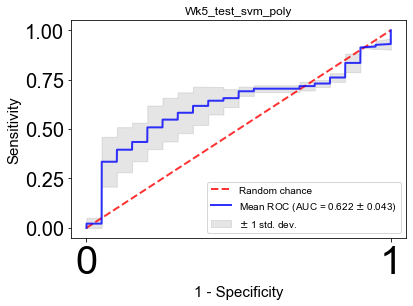

In [14]:
# Test the 7.5 week classifier on the 5 week data 

val_class_dict, test_class_dict = paa.classify.classify_kfold_roc(
                Wk75X, Wk75Y, classifier, kernel, 10, 'KP', False, 
                None, Wk5X, Wk5Y)

tprs_test = test_class_dict["tprs"]
aucs_test = test_class_dict["aucs"]

save_name_test = 'Wk5' + "_test_" + classifier_name
paa.vis.plot_kfold_roc(tprs_test, aucs_test, out_path, save_name_test, show_sd=True)

# Use multiclass classification
This will create a new classifier that is trained on the 7.5 week data and tested on the 5 week data 

In [15]:
# Split up the samples into training, validation, and testing groups that are amenable to multiclassification 

Wk75X, Wk75Y, df, Wk75X_test, Wk75Y_test, df_test = Wk75_data_for_class.make_multiclass_dataset(
        ['KP', 'Control'])

Wk5X_test, Wk5Y_test, df_test, _,_,_ = Wk5data_for_class.make_multiclass_dataset(
            ['KP', 'Control'])

# This line actually trains the multiclass classifier on the 7.5 week data, 
# performs cross validation on the 7.5 week data based on the groups that were created by the above lines 
# and tests the classifier on the 5 week data 
val_class_dict, val_df, test_class_dict, test_df = paa.classify.multiclass_classify(
                Wk75X, Wk75Y, classifier, kernel, 10, save_name, False, 
                None, Wk5X_test, Wk5Y_test
    )

# Get the categories of samples that were used to train and test the classifier 
import numpy as np 
classes = np.unique(Wk75Y)
test_classes = np.unique(Wk5Y_test)

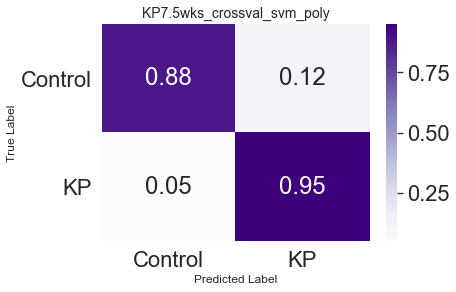

In [16]:
# You can plot the confusion matrix for the cross validation performed on the 7.5 week data
paa.vis.plot_confusion_matrix(val_df, classes, classes, out_path,
                save_name_val, cmap='Purples')

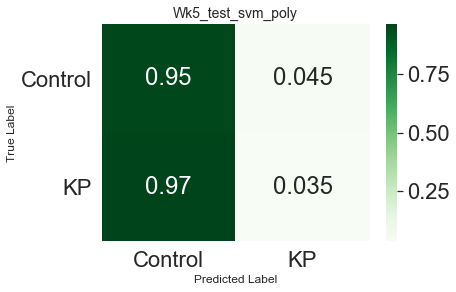

In [17]:
# You can also plot the confusion matrix for the test performed on the 5 week data
paa.vis.plot_confusion_matrix(test_df, classes, test_classes, out_path,
                save_name_test, cmap='Greens')